<a href="https://colab.research.google.com/github/DIWAKAR-V/ML-Regression-Project-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project name - Bike Sharing Demand Prediction**:

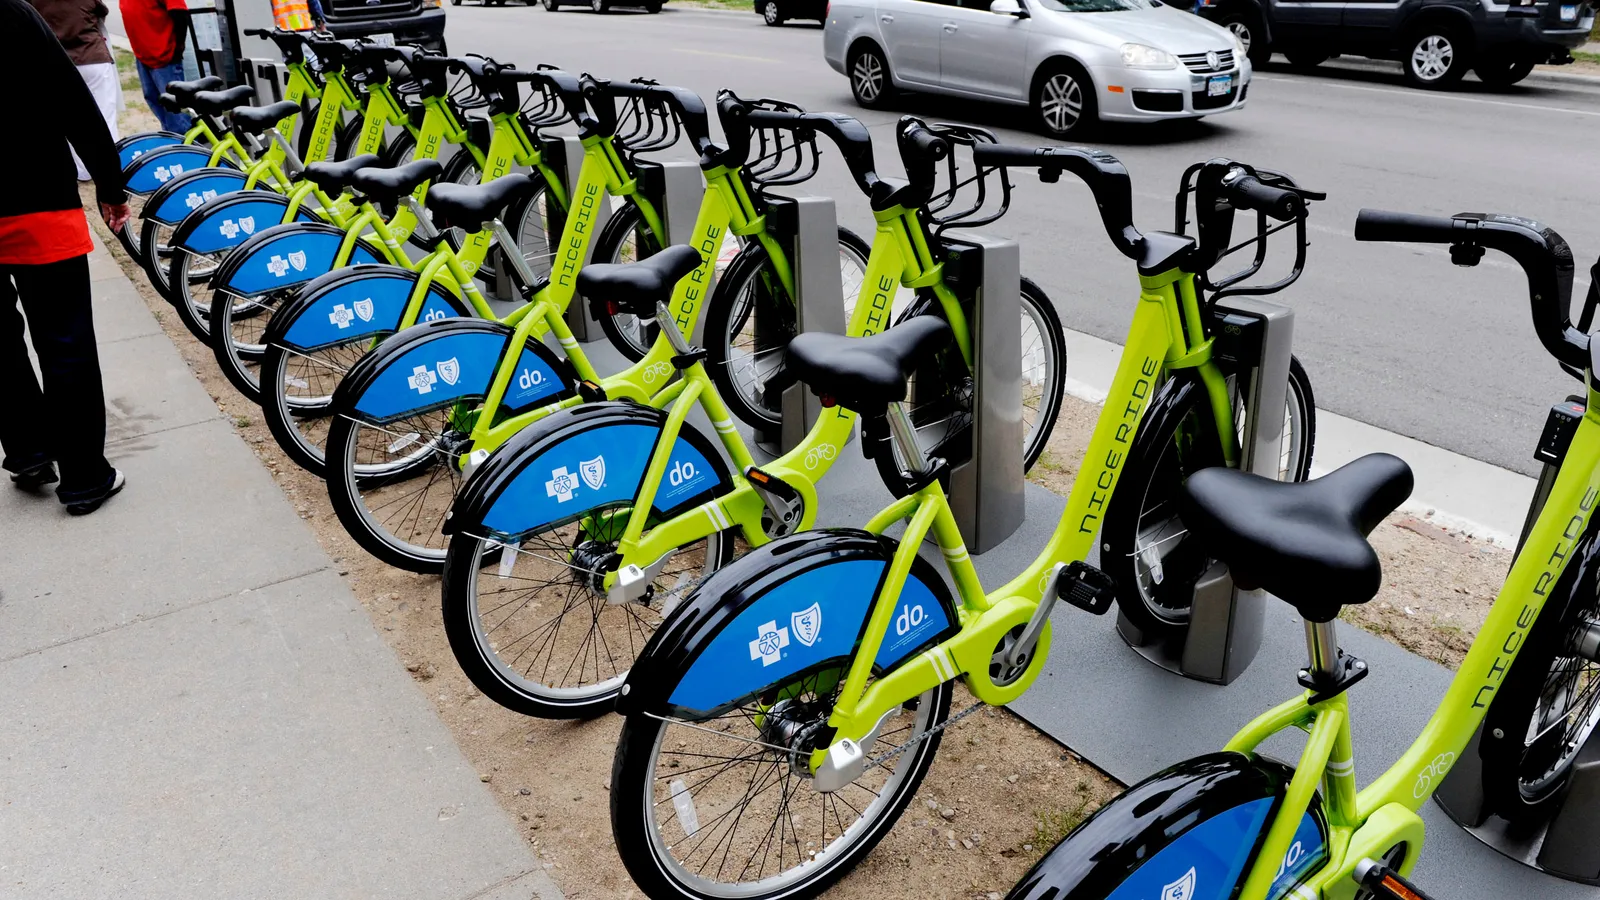

# Data Description:
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Project Summary :**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

**Github Link** -https://github.com/DIWAKAR-V/ML-Regression-Project-Bike-Sharing-Demand-Prediction/tree/main#ml-regression-project-bike-sharing-demand-prediction

INITIALIZING DATA:

In [1]:
# Importing required libraries
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
import xgboost as xgb


import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/SeoulBikeData.csv",encoding="latin")

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.shape

(8760, 14)

In [6]:
print("number of rows :",data.shape[0])
print("number of columns :",data.shape[1])

number of rows : 8760
number of columns : 14


In [7]:
#checking for null values in dataset
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
#checking for duplicate values in dataset
len(data[(data.duplicated())])

0

In [9]:
#viewing the columns name in our dataset
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
#getting information about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
#description about our data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [12]:
#converting date column
data['Date'] = pd.to_datetime(data['Date'])
data['month'] = data.Date.dt.month
data['weekday'] = data.Date.dt.weekday
data['week'] = data.Date.dt.week

In [13]:
#droping date column
data.drop(columns=['Date'], inplace=True)

In [14]:
#viewing our added columns after converting and dropping of date column
data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekday', 'week'],
      dtype='object')

In [15]:
#extracting the numerical features in our dataset
numeric_features = data.describe().columns
numeric_features=numeric_features.tolist()##converting index to list##
numeric_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'month',
 'weekday',
 'week']

In [16]:
#Extracting categorical columns
categorical_features= data.select_dtypes(include='object')
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

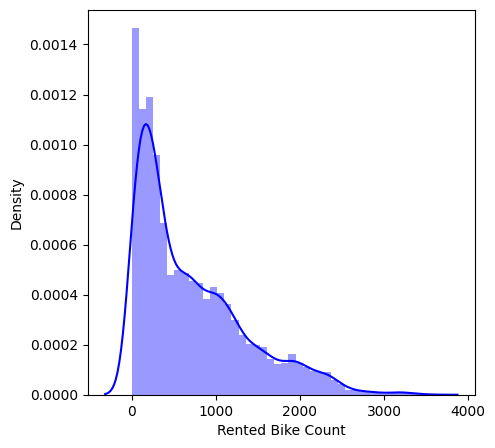

In [17]:
#visualising distribution of rented bike count
plt.figure(figsize=(5,5))
sns.distplot(data['Rented Bike Count'],color='b')

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

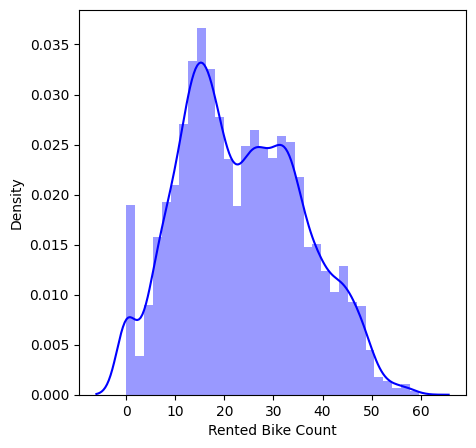

In [18]:
#transforming with square_root transformation on it to bring it closer to normal distribution
plt.figure(figsize=(5,5))
sns.distplot(np.sqrt(data['Rented Bike Count']),color="b")

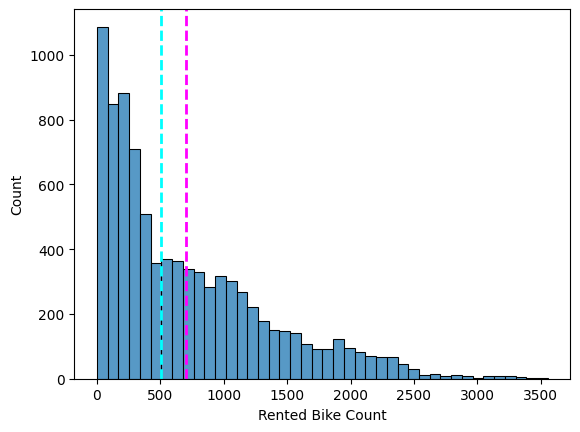

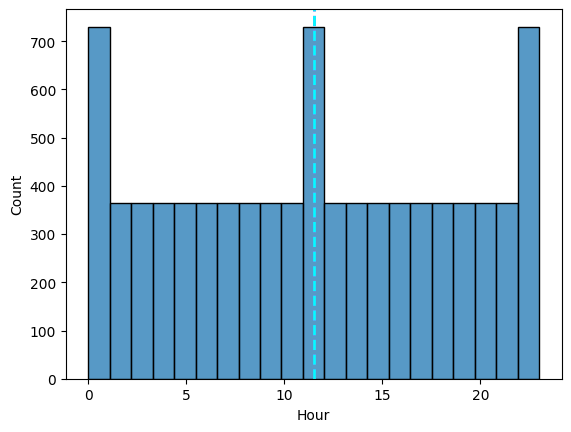

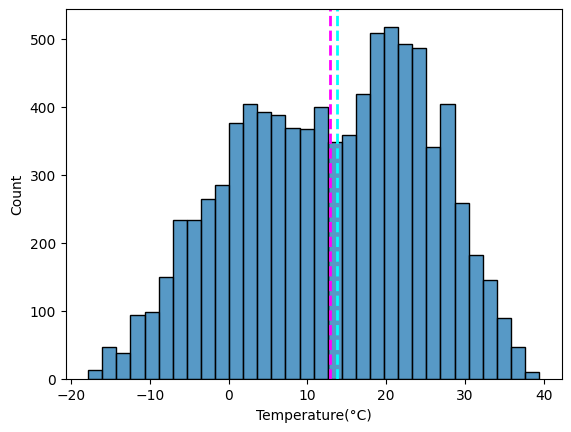

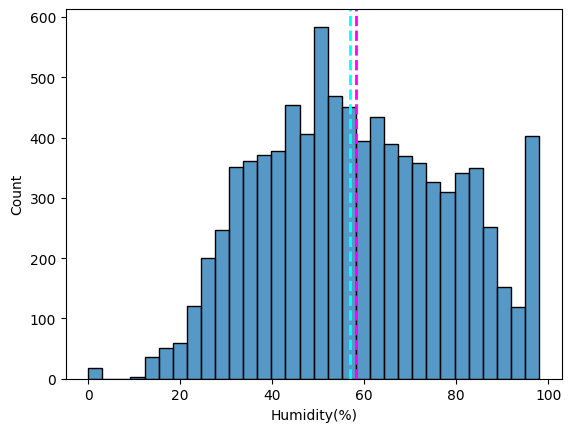

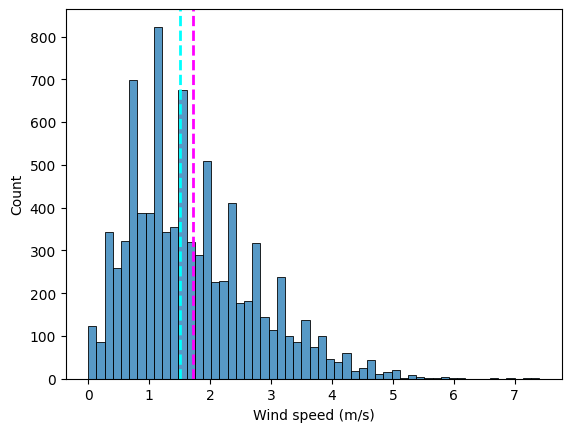

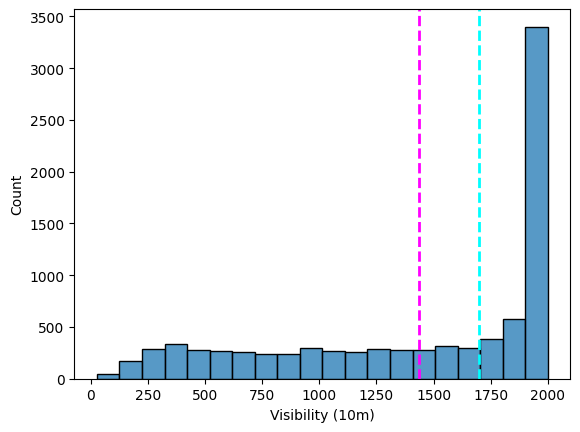

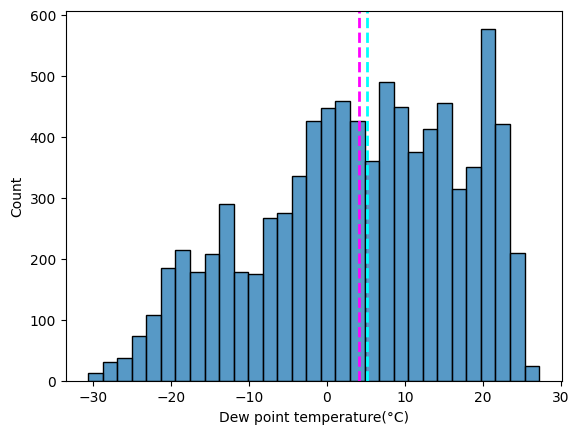

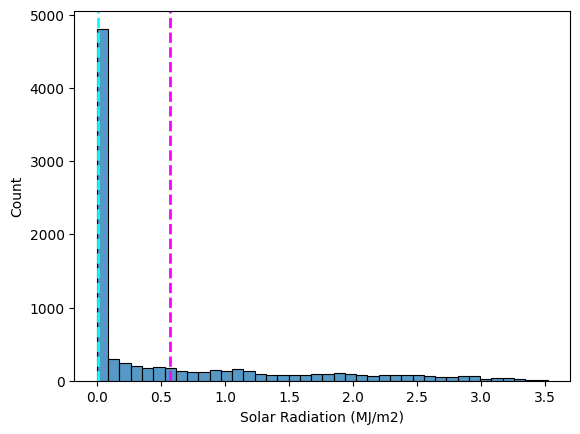

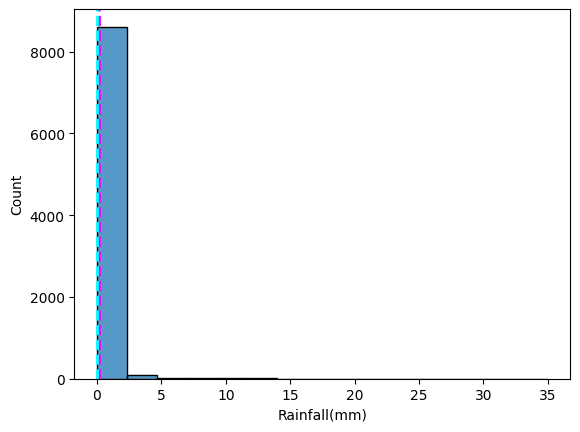

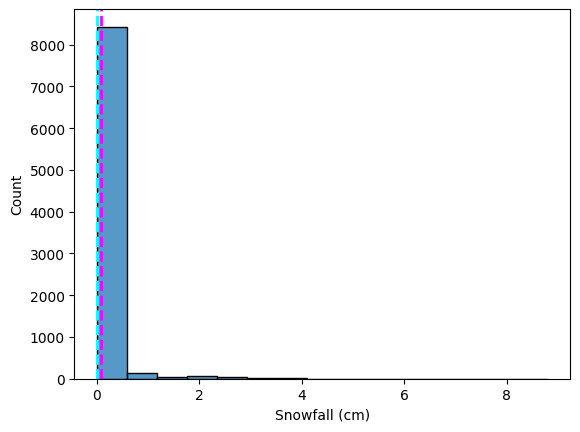

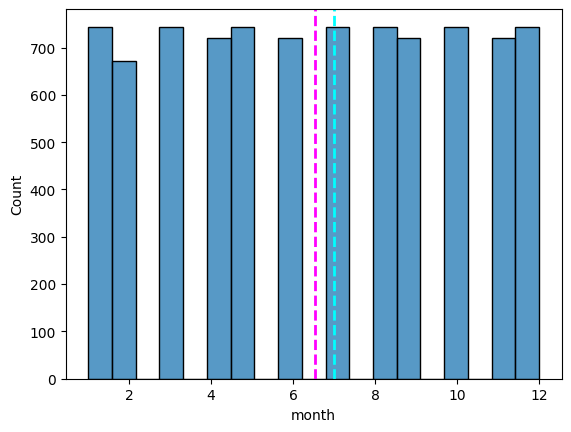

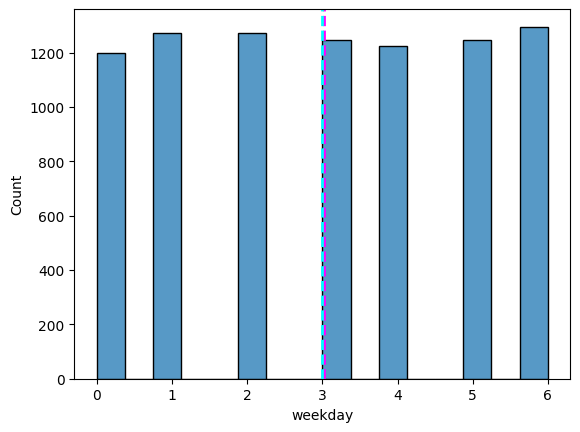

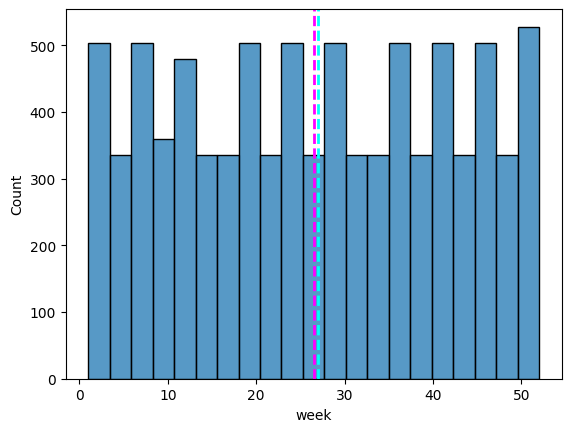

In [19]:
#plotting histogram of numeric_features in our dataset
for col in numeric_features[:]:
  sns.histplot(data[col])
  plt.axvline(data[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(data[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.show()

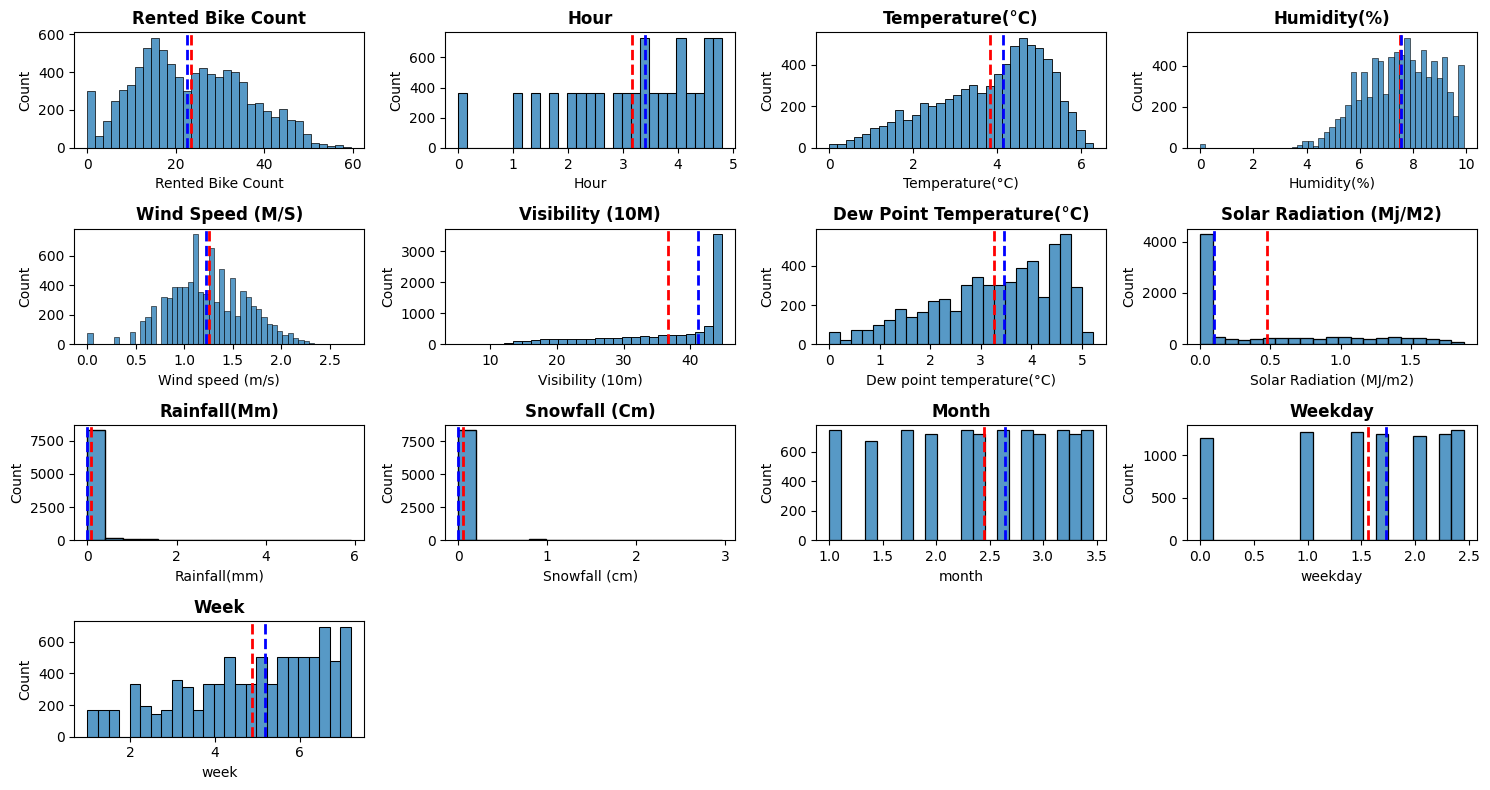

In [20]:
# plot a bar plot for each numerical feature count by transforming with square root to move dataset close to normality
plt.figure(figsize=(15,8))
for n,column in enumerate(numeric_features):
  feature = np.sqrt(data[column])
  ax=plt.subplot(4, 4,n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

<Axes: >

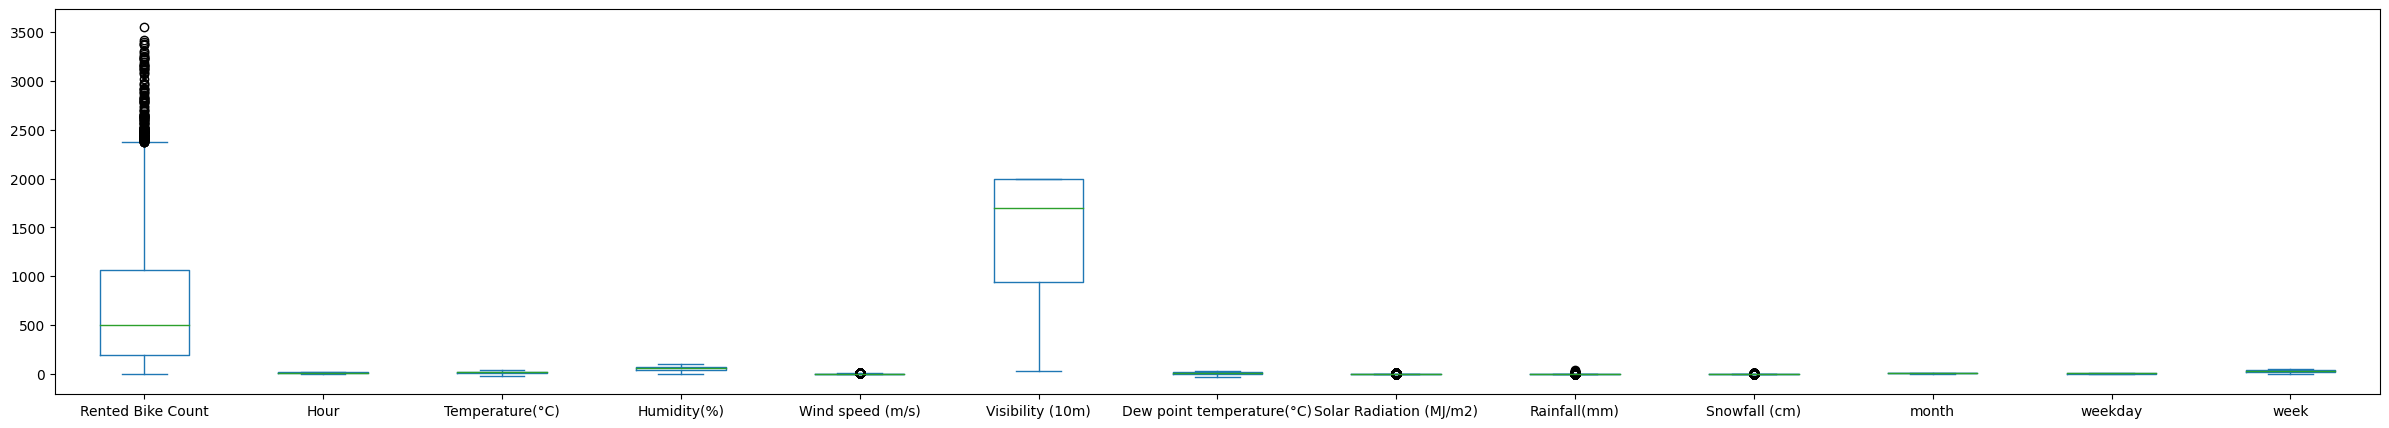

In [21]:
#checking outliers with box plot
data.plot(kind="box",figsize=(30,5))

In [22]:
#outlier removal using IQR technique
#Using IQR
q1, q3, median = data['Rented Bike Count'].quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
data['Rented Bike Count'] = np.where(data['Rented Bike Count'] > upper_limit, median,np.where(
                            data['Rented Bike Count'] < lower_limit,median,data['Rented Bike Count']))

#Capping extreme values
for col in ['Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']:
  upper_limit = data[col].quantile(0.99)
  data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])


In [23]:
[print(f'{i}: \n {data[i].value_counts()} \n') for i in categorical_features]

Seasons: 
 Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

Holiday: 
 No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Functioning Day: 
 Yes    8465
No      295
Name: Functioning Day, dtype: int64 



[None, None, None]

## Feature Engineering :

In [24]:
# Defining a label encoder based on above data
encoder = {'Holiday':{'Holiday':1, 'No Holiday':0},'Functioning Day':{'Yes':1, 'No': 0},
          'Time_of_the_Day': {'night':0, 'morning':1, 'afternoon':2, 'evening':3},
           'Functioning Day':{"Yes":1,'No':0}}

# Label Encoding
data = data.replace(encoder)

# One Hot Encoding
data = pd.get_dummies(data, columns=["Seasons"], prefix='', prefix_sep='')

In [25]:
#viewing our dataset
data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,weekday,week,Autumn,Spring,Summer,Winter
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,3,2,0,0,0,1
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,3,2,0,0,0,1
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,3,2,0,0,0,1
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,3,2,0,0,0,1
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,3,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003.0,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,11,4,48,1,0,0,0
8756,764.0,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,11,4,48,1,0,0,0
8757,694.0,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,11,4,48,1,0,0,0
8758,712.0,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,11,4,48,1,0,0,0


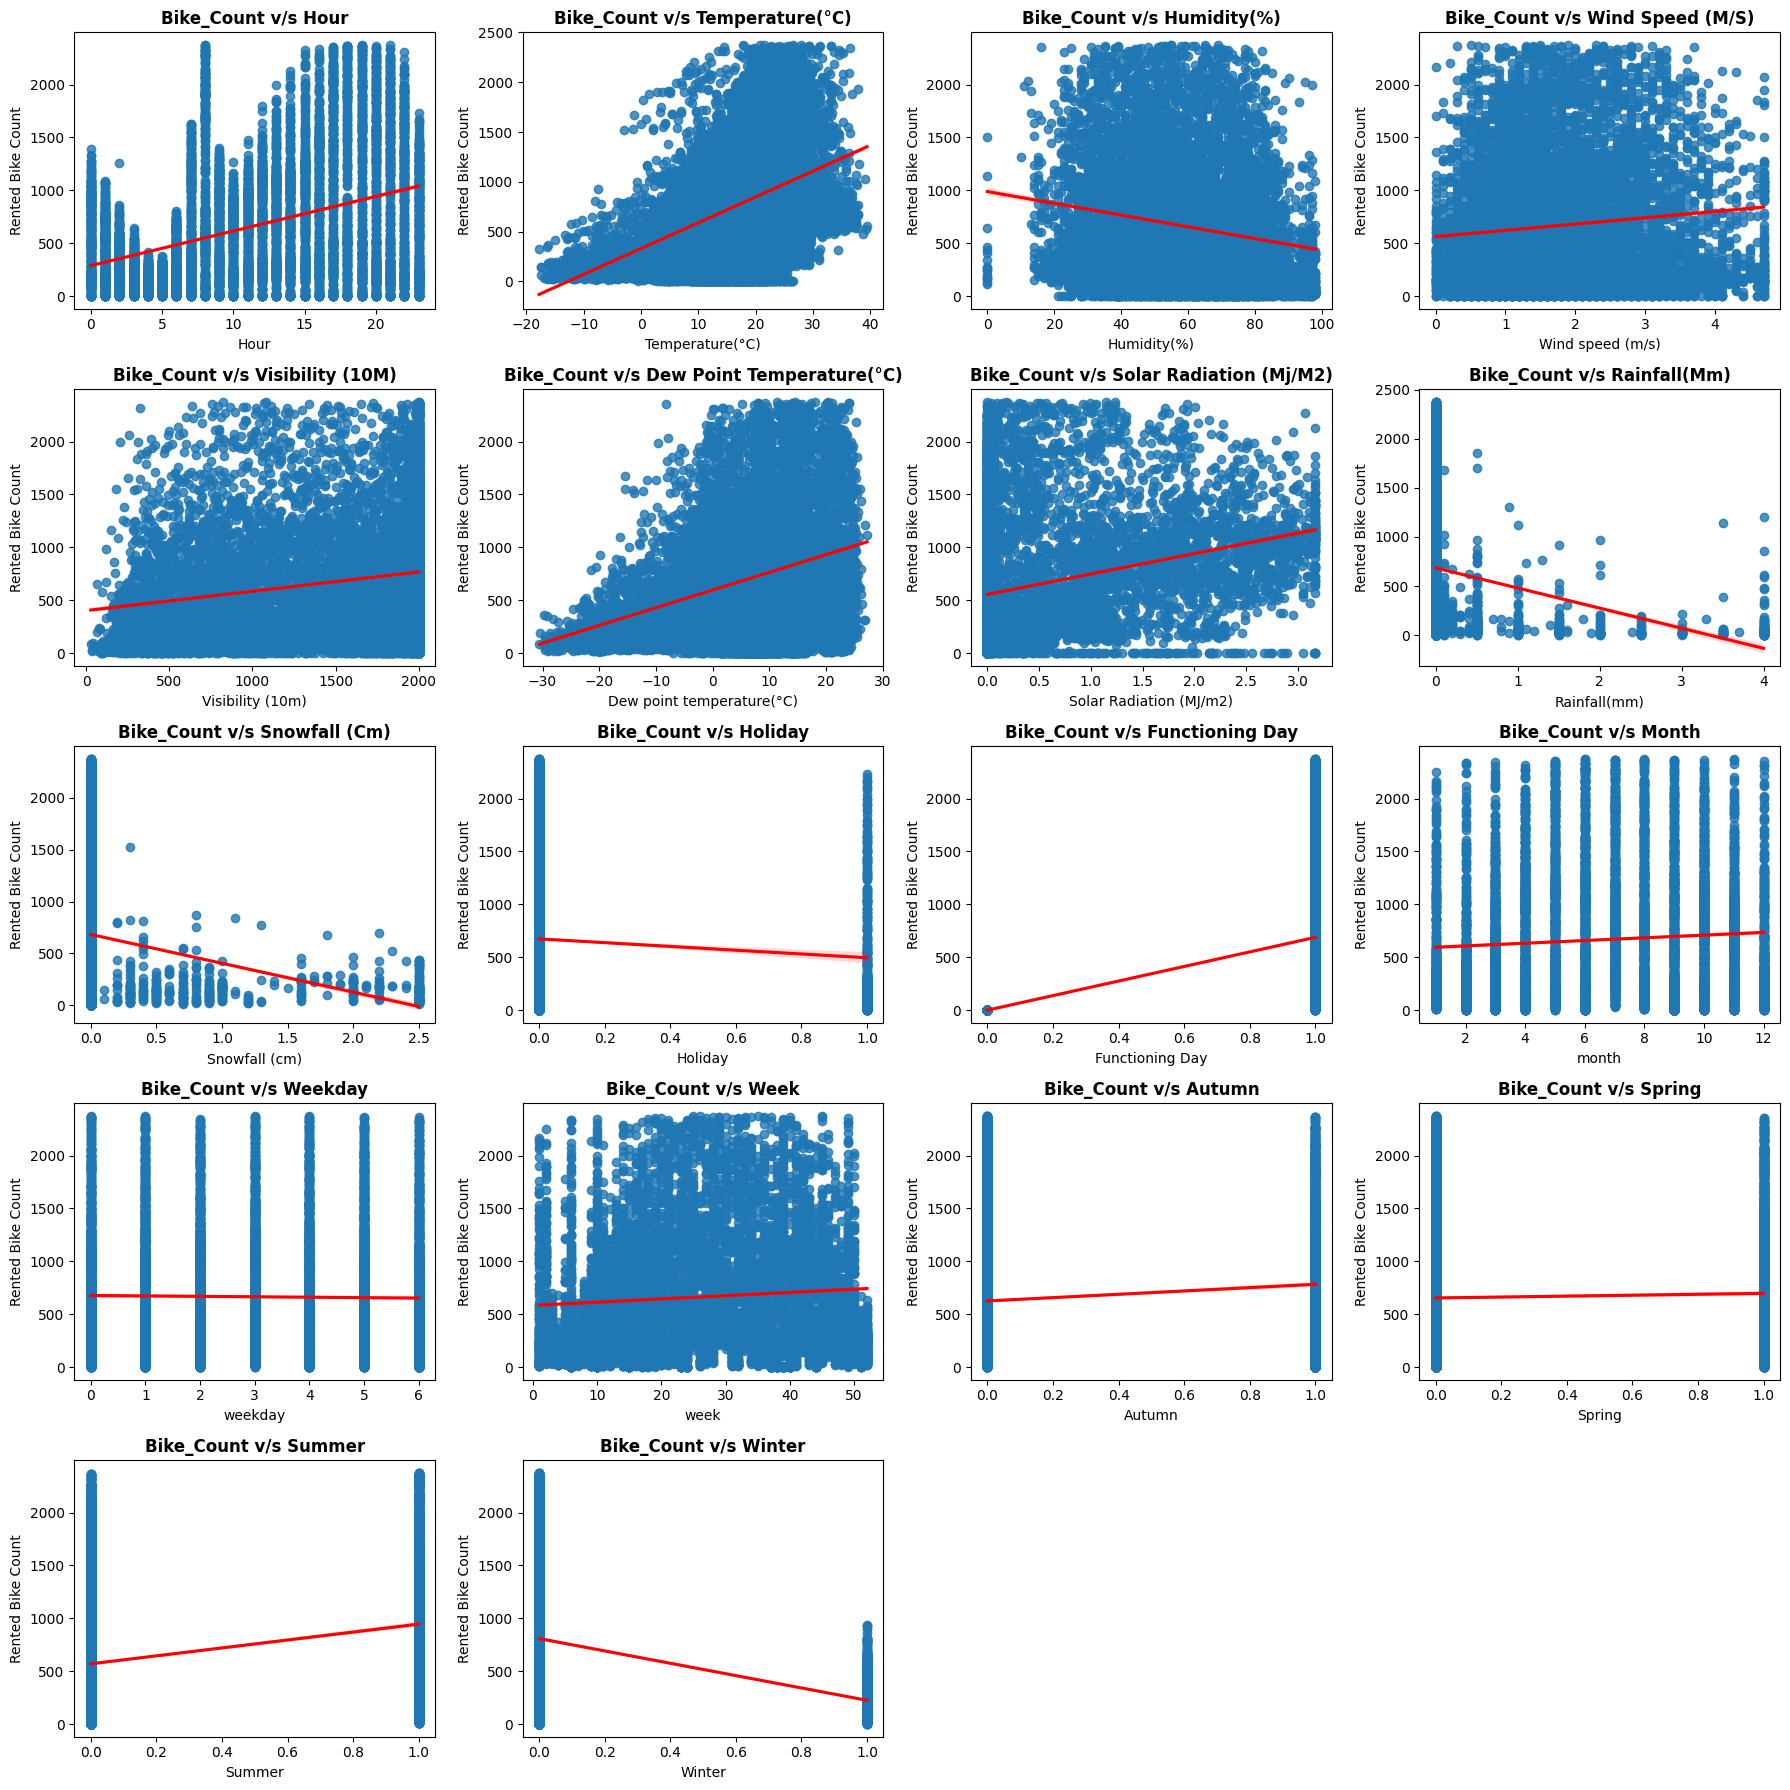

In [26]:
#plotting regplot to plot data and a linear regression model fit between dependent and independent variables
independent_variables = [i for i in data.columns if i not in ['Rented Bike Count']]

plt.figure(figsize=(18,18))
for n,column in enumerate(independent_variables):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = data, x = column, y ='Rented Bike Count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

<Axes: >

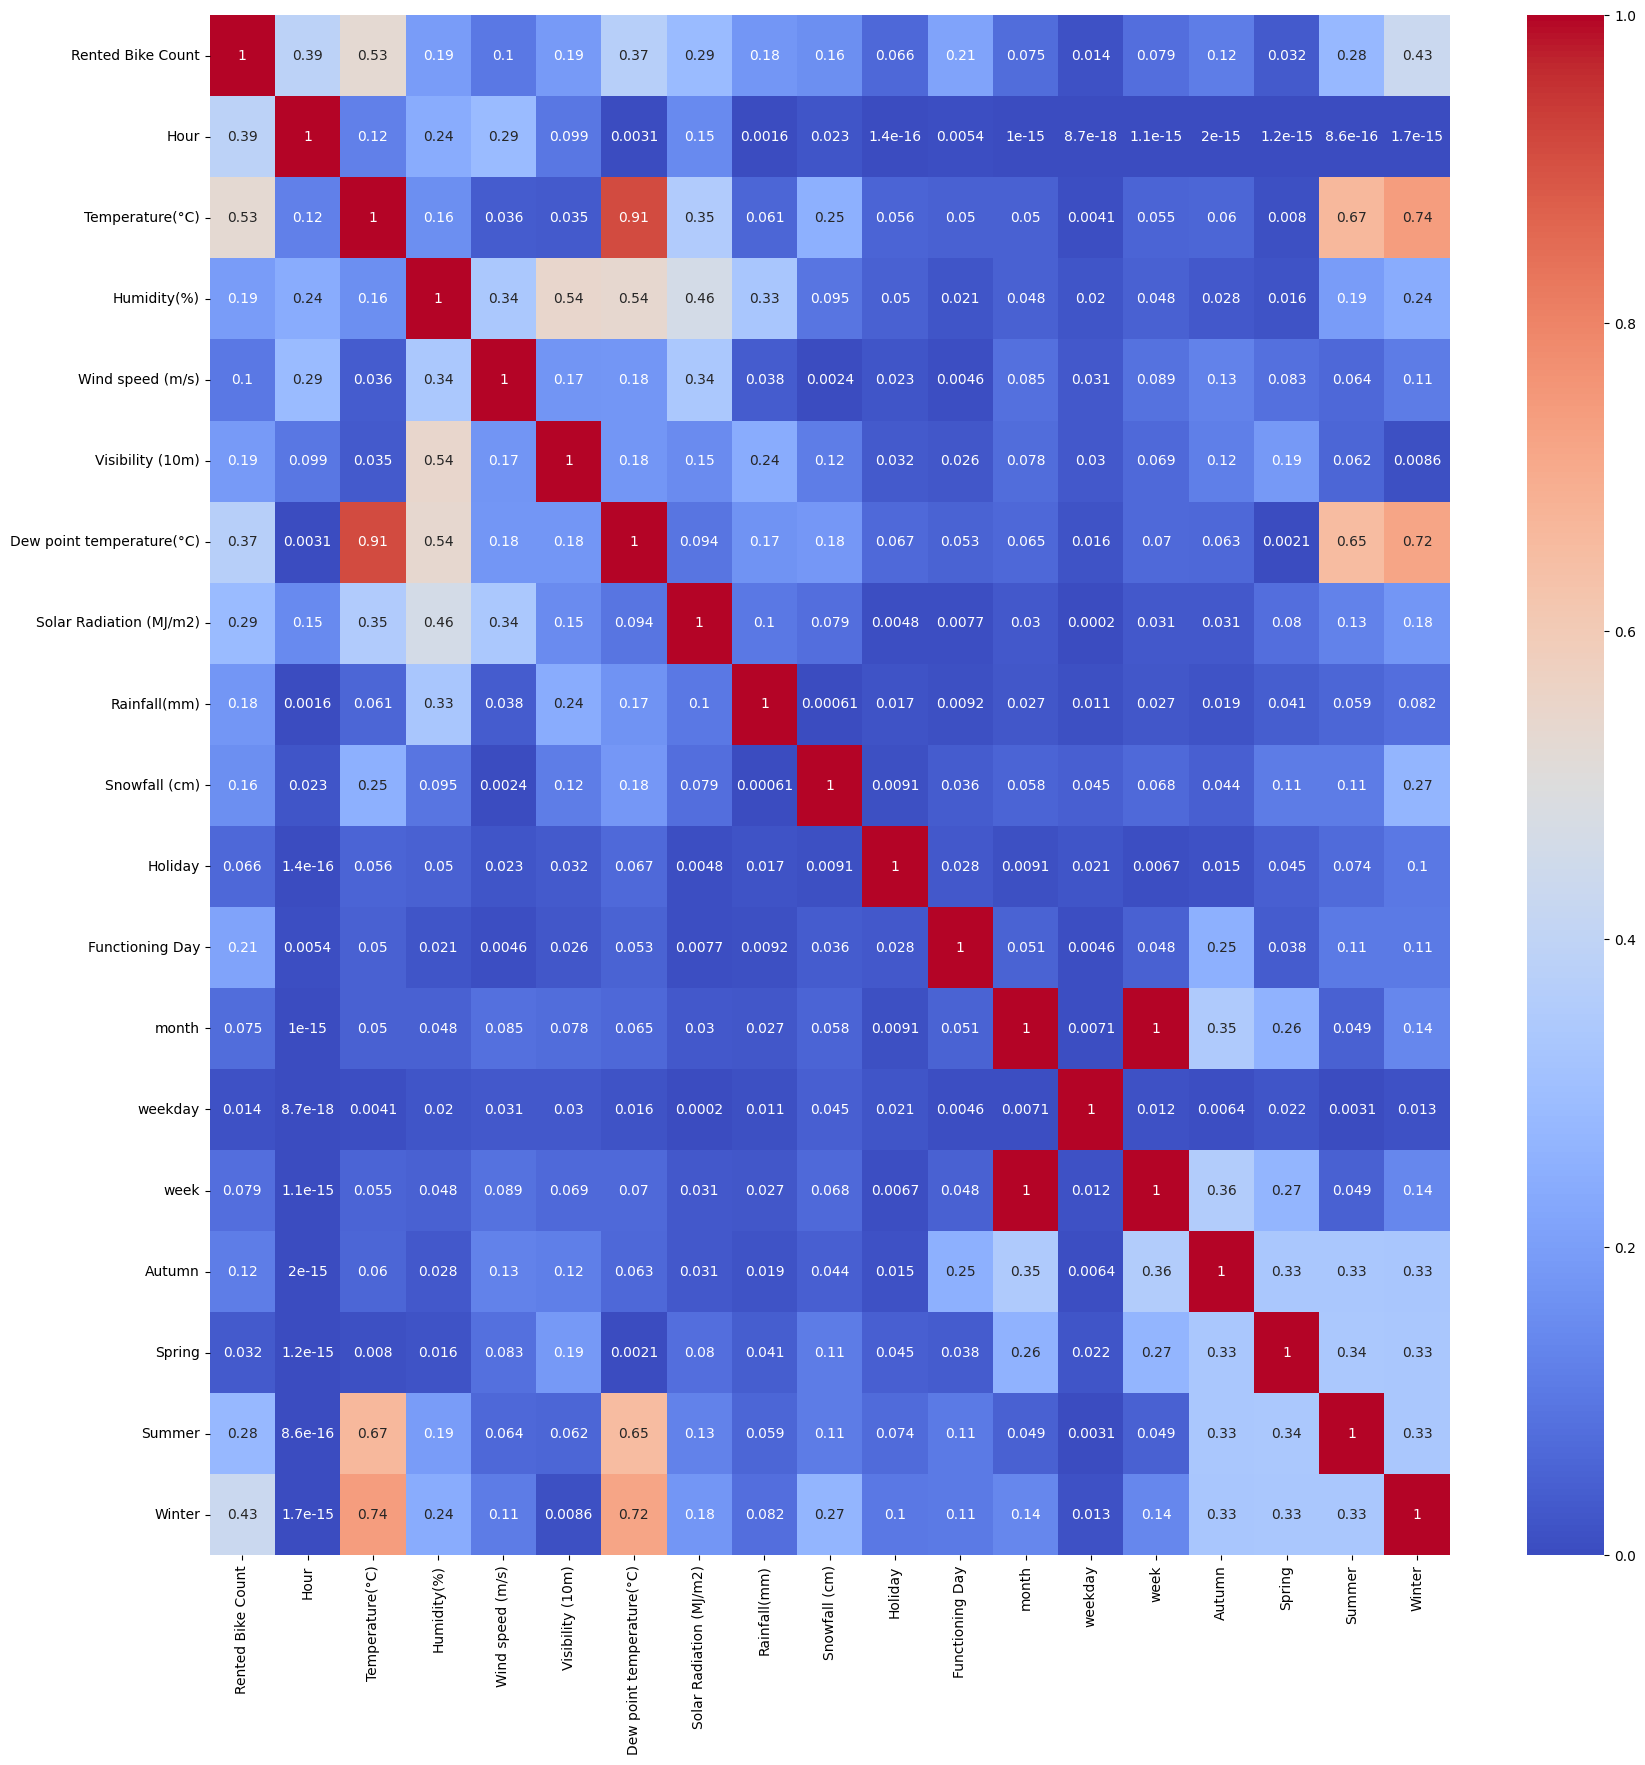

In [27]:
#checking for multicollinearity
correlation = data.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [28]:
#Handling multicollinearity by calculating VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

In [29]:
independent_variables=[i for i in data.describe().columns if i not in ['Rented Bike Count']]
calc_vif(data[independent_variables])

,variables,VIF
0,week,155.551181
1,month,154.237861
2,Dew point temperature(°C),119.251458
3,Summer,117.963950
4,Spring,113.540902
5,Autumn,112.823442
6,Winter,108.504200
7,Temperature(°C),91.077567
8,Humidity(%),21.231062
9,Solar Radiation (MJ/m2),2.059904


In [30]:
#calculating and creating our new independent variables by eliminating variables which have high VIF value
independent_variables=[i for i in data.describe().columns if i not in ['Rented Bike Count','week','month','Dew point', 'temperature(°C)','Summer','Spring','Autumn','Winter','Temperature(°C)'] ]
calc_vif(data[independent_variables])

,variables,VIF
0,Functioning Day,20.916299
1,Humidity(%),14.548008
2,Visibility (10m),6.597282
3,Wind speed (m/s),4.874127
4,Hour,4.053655
5,weekday,3.231542
6,Solar Radiation (MJ/m2),2.157943
7,Dew point temperature(°C),1.965546
8,Rainfall(mm),1.173354
9,Snowfall (cm),1.142904


In [31]:
#creating new dataset
data = data[independent_variables + ['Rented Bike Count']]
data.head()

,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,weekday,Rented Bike Count
0,0,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,3,254.0
1,1,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,3,204.0
2,2,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,3,173.0
3,3,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,3,107.0
4,4,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,3,78.0


In [32]:
data.shape

(8760, 12)

<Axes: >

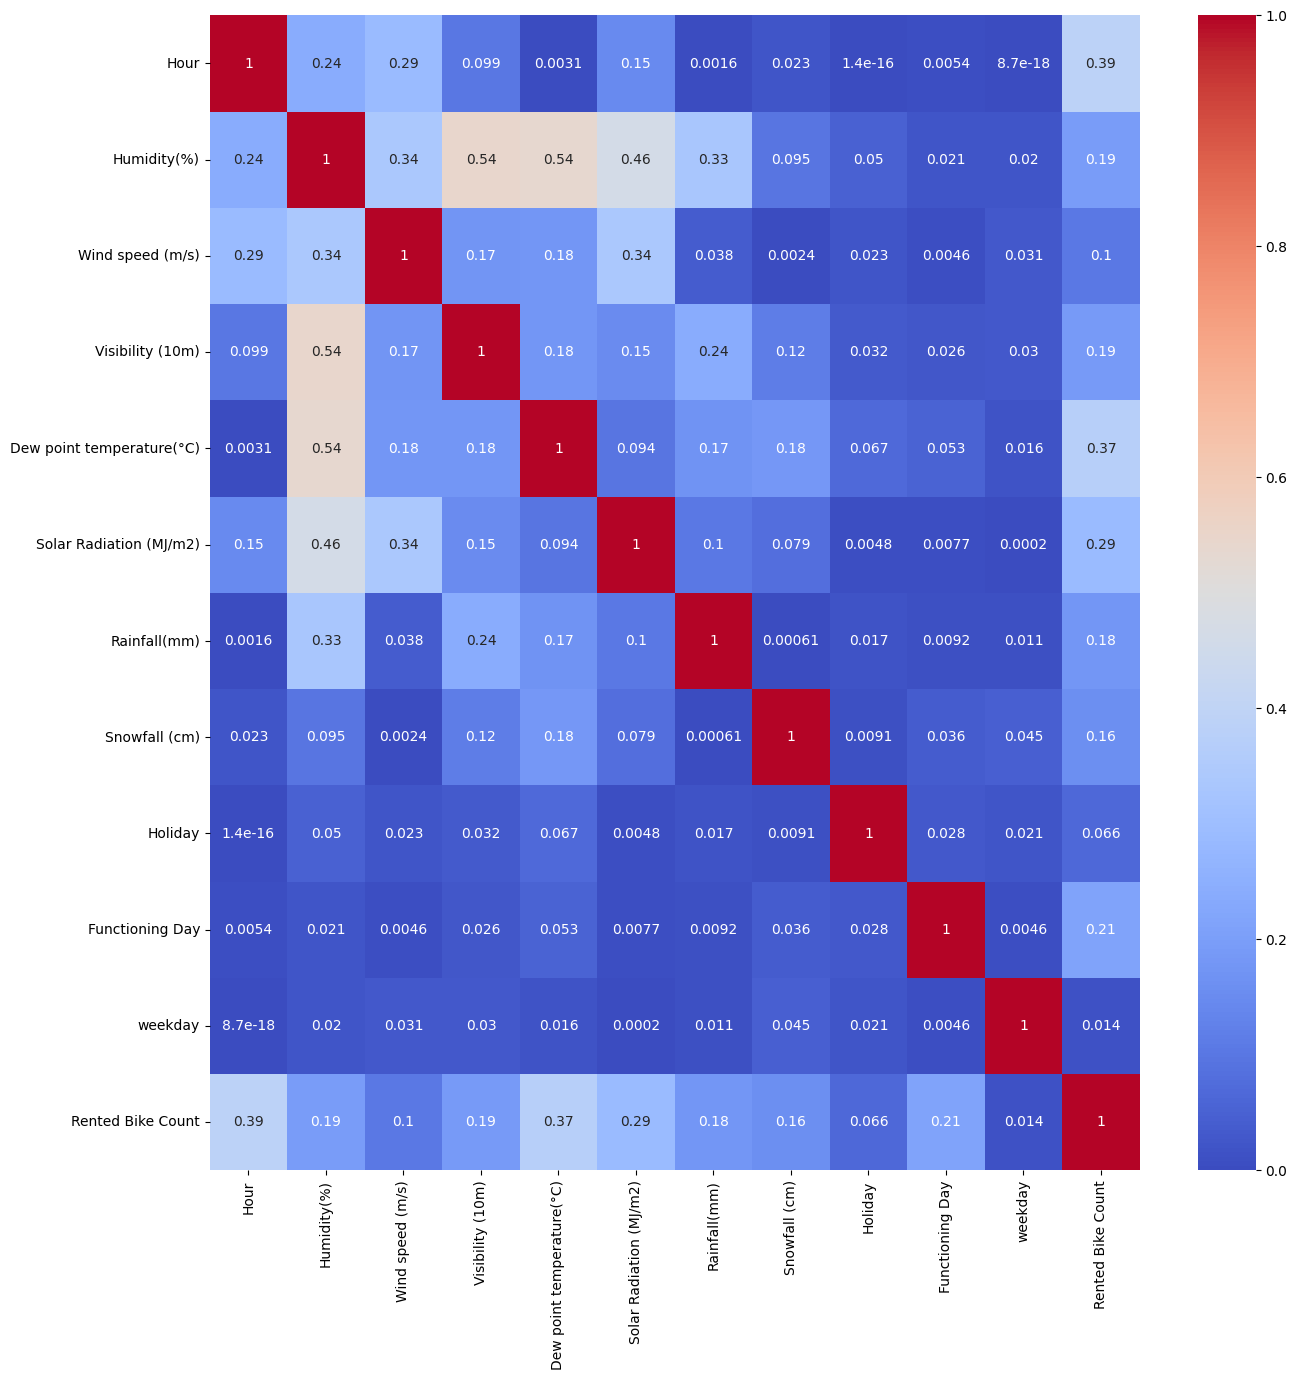

In [33]:
#checking for multicollinearity once again by heatmap
correlation = data.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##  Data Pre-processing :

In [34]:
#X is a dataframe with all independant features
X = data[independent_variables]

#y denotes the target variable
y = np.sqrt(data['Rented Bike Count'])


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [36]:
# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(7008, 11) (7008,)
(1752, 11) (1752,)


In [37]:
# Scaling the data
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


## ***ML Model Implementation:***

In [38]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet(random_state=0)],
           ['DecisionTreeRegresson: ', DecisionTreeRegressor()],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()],
           ['AdaBoostRegressor: ',AdaBoostRegressor()]
         ]

In [39]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state =42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [40]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.012193679809570312,
  'Test_R2_Score': 0.5648688128788008,
  'Test_RMSE_Score': 7.791935255116955},
 {'Name': 'Ridge: ',
  'Train_Time': 0.015410423278808594,
  'Test_R2_Score': 0.6115079266797463,
  'Test_RMSE_Score': 7.362516998019815},
 {'Name': 'ElasticNet: ',
  'Train_Time': 0.0056231021881103516,
  'Test_R2_Score': 0.48710352375471677,
  'Test_RMSE_Score': 8.459605037123083},
 {'Name': 'DecisionTreeRegresson: ',
  'Train_Time': 0.14859533309936523,
  'Test_R2_Score': 0.704664289518698,
  'Test_RMSE_Score': 6.419381862847581},
 {'Name': 'RandomForest ',
  'Train_Time': 3.9698894023895264,
  'Test_R2_Score': 0.8604893055704983,
  'Test_RMSE_Score': 4.412035312070502},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 1.797799825668335,
  'Test_R2_Score': 0.8658165561490597,
  'Test_RMSE_Score': 4.326978093161355},
 {'Name': 'GradientBoostingClassifier: ',
  'Train_Time': 0.8528873920440674,
  'Test_R2_Score': 0.8099648445950638,
  'Test_RMSE_S

In [41]:
#creating a data frame of our results
result_data = pd.DataFrame(model_data)
print(result_data)

                           Name  Train_Time  Test_R2_Score  Test_RMSE_Score
0                       Lasso:     0.012194       0.564869         7.791935
1                       Ridge:     0.015410       0.611508         7.362517
2                  ElasticNet:     0.005623       0.487104         8.459605
3       DecisionTreeRegresson:     0.148595       0.704664         6.419382
4                 RandomForest     3.969889       0.860489         4.412035
5          ExtraTreeRegressor :    1.797800       0.865817         4.326978
6  GradientBoostingClassifier:     0.852887       0.809965         5.149348
7                XGBRegressor:     0.628306       0.852764         4.532549
8           AdaBoostRegressor:     0.428647       0.634165         7.144598


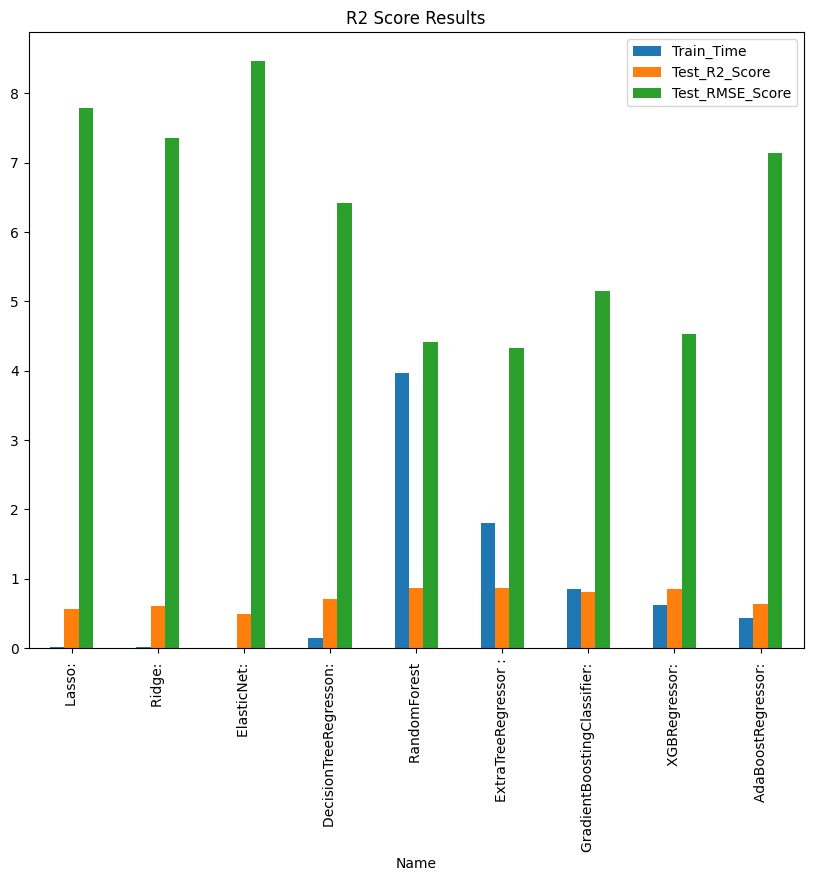

In [42]:
#plotting the result data
result_data.plot(x="Name", y=['Train_Time','Test_R2_Score','Test_RMSE_Score'], kind="bar",
               title = 'R2 Score Results' ,
               figsize= (10,8)) ;

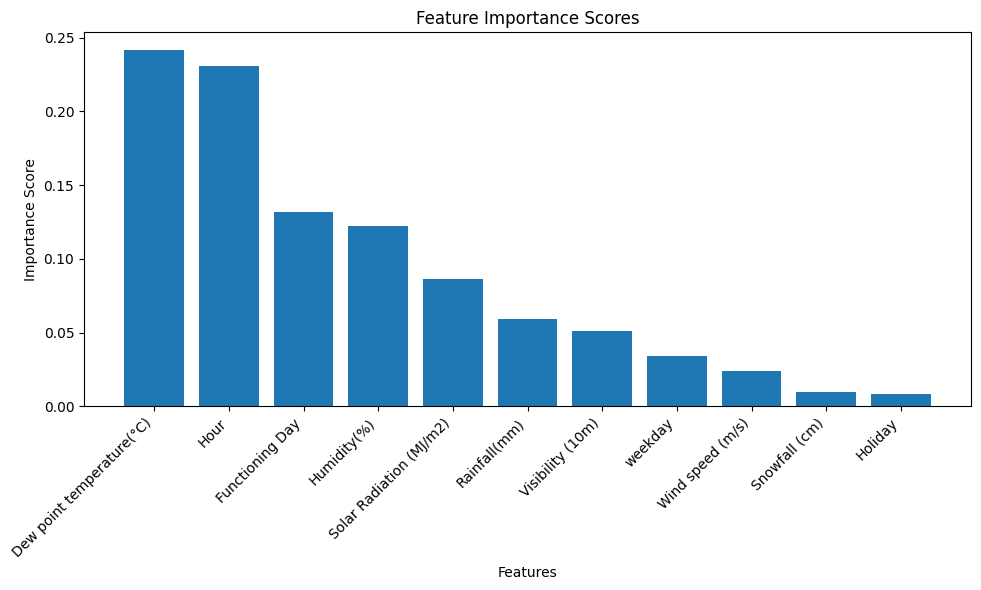

In [43]:
#from above it is clearly known that ExtraTreeRegressor model performing well
#clearly viewing the model and finding the important feature
# Training the ExtraTreesRegressor model
model = ExtraTreesRegressor()
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Get feature importance scores from the trained model
feature_importance =model.feature_importances_

# Get feature names (assuming you have a list of feature names)
feature_names = data.columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.tight_layout()
plt.show()

## Cross-validation and Hyperparameter tuning:

In [45]:
param_grid = [{
              'max_depth': [50, 100, 150,250],
              'n_estimators' : [100,200,300,400],
              'max_features': ["auto", "sqrt", "log2"]
            }]
regression = ExtraTreesRegressor(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = regression, param_grid = param_grid, cv = 5,n_jobs=-1, scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [50, 100, 150, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 200, 300, 400]}],
             scoring='r2', verbose=2)

In [46]:
# Best Tuned parameter set
grid_search.best_params_

{'max_depth': 50, 'max_features': 'auto', 'n_estimators': 300}

In [47]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(X_train,y_train)

1.0

In [48]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(X_test,y_test)

0.8669110223385684

In [49]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)))

4.309295481162116

In [50]:
#saving model in googledrive
import joblib
joblib.dump((ExtraTreesRegressor),'Project-Bike Sharing Demand Prediction-final.ml')

['Project-Bike Sharing Demand Prediction-final.ml']

# **Conclusion**:

**Models Used:**

1.Lasso     

2.Ridge       

3.ElasticNet

4.DecisionTreeRegression     

5.RandomForest  

6.ExtraTreeRegressor

7.GradientBoostingClassifier

8.XGBRegressor  

9.AdaBoostRegressor

**ExtraTreeRegressor** seems to be performing better as compared to other models and we can consider it to be the best model here for this problem statement.

Prominent Features:

The prominent feature in our better performing model ExtraTreeRegressor is **Dew point temperature(°C)**

**Model Performance description
(Metrics:R2_SCORE , RMSE):**

**R2 Score (top three models):**

1.ExtraTreeRegressor -  0.865817

2.RandomForest -  0.860489

3.XGBRegressor - 0.852764


**RMSE for top three models:**

1.ExtraTreeRegressor -  4.326978

2.RandomForest -  4.412035

3.XGBRegressor - 4.532549
